## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very ope
n-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

## This is my homework!

### Iris data from .csv

I'll work first with the Iris data set. I'll use pandas to read it and describe it. Then visualize it with matplotlib and seaborn.

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Now I want to see what kind of data PetalLengthCM and Species are

In [4]:
type(iris['PetalLengthCm'])

pandas.core.series.Series

In [5]:
type(iris['Species'])

pandas.core.series.Series

I want to see the mean petal lengths and widths between the different species, so I'll use the pandas' pivot table.

In [6]:
import numpy as np

In [7]:
pd.pivot_table(iris, values=['PetalLengthCm','PetalWidthCm'], index = 'Species', aggfunc=np.mean)

,PetalLengthCm,PetalWidthCm
Species,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


In [8]:
import matplotlib.pyplot as mpl

In [9]:
%matplotlib inline

In [10]:
import seaborn as sns

Text(0,0.5,'Petal Length/Width (Cm)')

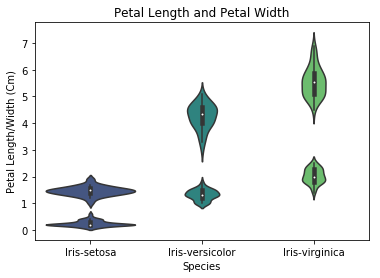

In [11]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, palette="viridis")
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, palette="viridis")
mpl.title("Petal Length and Petal Width")
mpl.ylabel("Petal Length/Width (Cm)")

It is fascinating to see how the average distance between petal length and petal width grows for each iris speicies.

Text(0.5,1,'The Relation Between Iris Petal Length and Petal Width')

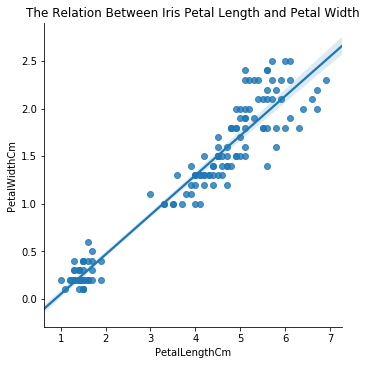

In [12]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=iris)
mpl.title("The Relation Between Iris Petal Length and Petal Width")

The abovescattr plot shows a strong linear relationship between petal width and length. It would be interesting to see how this changes when we drill down to species:

Text(0.5,1,'Iris Petal Length and Petal Width by Species')

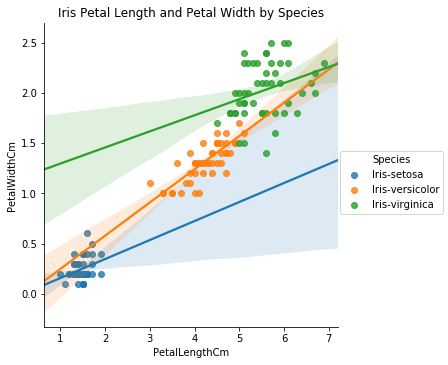

In [13]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, hue="Species")
mpl.title("Iris Petal Length and Petal Width by Species")

Nature is beatiful.

### Nonfarm Payroll Data from FRED, using an api

In [14]:
from fredapi import Fred
fred = Fred(api_key="7a9c02dcad776de16efb3eef1a2b293d")

In [15]:
NonFarmPayrolls = fred.get_series("PAYEMS")

In [16]:
NonFarmPay_DF = pd.DataFrame(NonFarmPayrolls)

In [17]:
NonFarmPay_DF.columns=['Payrolls']

In [18]:
NonFarmPay_DF.head()

,Payrolls
1939-01-01,29923.0
1939-02-01,30101.0
1939-03-01,30280.0
1939-04-01,30094.0
1939-05-01,30300.0


A simple description of the data would be nice.

In [20]:
NonFarmPay_DF.describe()

,Payrolls
count,948.000000
mean,87502.240506
std,35559.355352
min,29923.000000
25%,53089.250000
50%,87078.000000
75%,125246.000000
max,147380.000000


In [ ]:
mpl.plot(NonFarmPay_DF)
mpl.ylabel('Payrolls')
mpl.xlabel('Year')
mpl.title("Fred Data yo!")

This plot shows a solid upward trend. It tells us that more jobs have gone to the nonfarming sector (I guess that is what you would call it). With more data to account for growth in population, we could show how significantly fewer people live the farm life. <strong>Sad</strong>.

### Museum Ratings from .json file

In [ ]:
Mus_World_Rating = pd.read_json("https://storage.googleapis.com/kaggle-datasets/182/386/traveler_rating_world.json?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1517539329&Signature=drOiv6mHZrNw%2FsQRWQYkBP6VgoL1jbiCANbyJ6v3Aob%2BzLyAPSFMFaR6%2FBmCgDfMxMaiK0EXwKH8GN2k8DwFOM9SP4F1odTlKqW2eJHiTxYCqFTFs%2F%2FUSGWjjtkKS8ZeoXBxlGF%2B0s04cNU2G76deoGtq5wLvISM7P1u%2F4i%2Bba5oim%2BtKmrvGK0fBOpXXOT7jGueIf%2BMCGBw%2F7FMPv%2FDU1UoiQhfH%2FMnRGsCebvwWQukp%2FJAIDPK2TB3V3PyrkThczpEpweLW2jqlIuUHlV290uKXcysB2RWYkJyfXcxtfXlw8wGHk2wna0feShlSkD%2Fw3WkHzpoz%2FHn9rVEfL4Gvw%3D%3D")

In [ ]:
Mus_World_Rating.head()

I want to transpose this.

In [ ]:
mus_wor_df = Mus_World_Rating.replace( '[\$,)]','', regex=True )

In [ ]:
Mus_World_Rating_T=Mus_World_Rating.transpose()

In [ ]:
Mus_World_Rating_T.head()

In [ ]:
Mus_World_DF = pd.DataFrame(Mus_World_Rating_T)

In [ ]:
museum_df_T = Mus_World_Rating_T.replace( '[\$,)]','', regex=True )
museum_df = Mus_World_Rating.replace( '[\$,)]','', regex=True )

In [ ]:
mpl.plot(museum_df_T)
mpl.title("Useless Museum Ratings!")
mpl.xlabel("Museums")
mpl.ylabel("Ratings")

The beatiful plot above shows - and very clearly I might add - the ratings of almost 900 museums throughout the world.

In [ ]:
mpl.plot(museum_df)

In [ ]:
Mus_World_Rating_T.describe()

We can see from the descriptive table above that 882 museums throughout the world have been rated and included in this data set. It also seems that zero was the most frequent value for ratings of value 4.

In [ ]:
pd.pivot_table(Mus_World_Rating_T, index=0, values=0, aggfunc='sum')

#### Below are just failed attempts. You can ignore these.

I want to import a json file for science.

In [ ]:
import json

In [ ]:
with open('US_category_id.json', 'r') as f:
    youtube = json.load(f)

In [ ]:
YouTube = pd.read_json('US_category_id.json')

In [ ]:
import requests

In [ ]:
csc=requests.get("https://api.data.gov/ed/collegescorecard/v1/schools?api_key=oAoyiiSQQJkUniCUsRnATIAv59IFEPPHK4CVRbRQ")

In [ ]:
type(csc)